# Projet Analyse de données ( Eaklim HOUR / Lucas LOPES)
## AirBnb

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
test_df = pd.read_csv("airbnb_test.csv")
test_df

Unnamed: 0 property_type        room_type  \
0        14282777     Apartment  Entire home/apt   
1        17029381     Apartment  Entire home/apt   
2         7824740     Apartment  Entire home/apt   
3        19811650         House  Entire home/apt   
4        12410741     Apartment  Entire home/apt   
...           ...           ...              ...   
51872    14844128         House  Entire home/apt   
51873    16051971         House  Entire home/apt   
51874    16429629     Apartment  Entire home/apt   
51875      324969         House     Private room   
51876     9684189     Apartment  Entire home/apt   

                                               amenities  accommodates  \
0      {"Wireless Internet","Air conditioning",Kitche...             3   
1      {"Wireless Internet","Air conditioning",Kitche...             7   
2      {TV,"Cable TV","Wireless Internet","Air condit...             5   
3      {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
4      {TV,Internet,"Wireless Internet","Air conditio...             2   
...                                                  ...           ...   
51872  {TV,"Cable TV",Internet,"Wireless Internet","A...             4   
51873  {TV,"Cable TV",Internet,"Wireless Internet","A...             4   
51874  {TV,"Wireless Internet","Air conditioning",Kit...             3   
51875  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
51876  {TV,"Cable TV","Wireless Internet",Kitchen,Gym...             3   

       bathrooms  bed_type cancellation_policy  cleaning_fee city  ...  \
0            1.0  Real Bed              strict          True  NYC  ...   
1            1.0  Real Bed              strict          True  NYC  ...   
2            1.0  Real Bed            moderate          True  NYC  ...   
3            1.0  Real Bed            flexible          True   SF  ...   
4            1.0  Real Bed            moderate          True   DC  ...   
...          ...       ...                 ...           ...  ...  ...   
51872        1.0  Real Bed            flexible         False   LA  ...   
51873        1.0  Real Bed            moderate          True  NYC  ...   
51874        1.0  Real Bed              strict          True  NYC  ...   
51875        1.0  Real Bed            moderate          True   LA  ...   
51876        1.0  Real Bed            flexible          True   SF  ...   

      last_review   latitude   longitude  \
0      2016-07-18  40.696524  -73.991617   
1      2017-09-23  40.766115  -73.989040   
2      2017-09-14  40.808110  -73.943756   
3             NaN  37.772004 -122.431619   
4      2017-01-22  38.925627  -77.034596   
...           ...        ...         ...   
51872         NaN  34.156056 -118.235445   
51873  2017-08-20  40.765323  -73.961502   
51874  2017-09-24  40.770700  -73.963228   
51875  2017-03-25  34.099417 -118.276401   
51876         NaN  37.777291 -122.412377   

                                                    name     neighbourhood  \
0                         Beautiful brownstone 1-bedroom  Brooklyn Heights   
1               Superb 3BR Apt Located Near Times Square    Hell's Kitchen   
2                                       The Garden Oasis            Harlem   
3                     Beautiful Flat in the Heart of SF!      Lower Haight   
4                             Great studio in midtown DC  Columbia Heights   
...                                                  ...               ...   
51872                        Lovely home in a Great City          Glendale   
51873  Penthouse 2BR w skylight,terrace, and a roof d...   Upper East Side   
51874               Comfy UES apt close to Central Park!   Upper East Side   
51875                Cozy room1; Silverlake, Los Angeles         Los Feliz   
51876                            Beautiful & New Jr 1BD-              SoMa   

      number_of_reviews review_scores_rating  zipcode  bedrooms  beds  
0                     2                100.0    11201       1.0   

In [ ]:
train_df = pd.read_csv("airbnb_train.csv")
train_df

id  log_price property_type        room_type  \
0       5708593   4.317488         House     Private room   
1      14483613   4.007333         House     Private room   
2      10412649   7.090077     Apartment  Entire home/apt   
3      17954362   3.555348         House     Private room   
4       9969781   5.480639         House  Entire home/apt   
...         ...        ...           ...              ...   
22229  11989532   4.605170     Apartment     Private room   
22230  20652462   5.043425     Apartment  Entire home/apt   
22231  12380210   5.220356     Apartment  Entire home/apt   
22232  19533966   5.273000     Apartment  Entire home/apt   
22233  18507240   4.852030          Boat  Entire home/apt   

                                               amenities  accommodates  \
0      {TV,"Wireless Internet",Kitchen,"Free parking ...             3   
1      {"Wireless Internet","Air conditioning",Kitche...             4   
2      {TV,"Wireless Internet","Air conditioning",Kit...             6   
3      {TV,"Cable TV",Internet,"Wireless Internet","A...             1   
4      {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
...                                                  ...           ...   
22229                                                 {}             1   
22230  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
22231  {TV,Internet,"Wireless Internet","Air conditio...             5   
22232  {TV,"Wireless Internet","Air conditioning",Kit...             2   
22233  {TV,Internet,"Wireless Internet",Kitchen,"Free...             4   

       bathrooms  bed_type cancellation_policy  cleaning_fee  ... last_review  \
0            1.0  Real Bed            flexible         False  ...         NaN   
1            2.0  Real Bed              strict         False  ...  2017-09-17   
2            2.0  Real Bed            flexible         False  ...         NaN   
3            1.0  Real Bed            flexible          True  ...  2017-09-29   
4            1.0  Real Bed            moderate          True  ...  2017-08-28   
...          ...       ...                 ...           ...  ...         ...   
22229        1.0  Real Bed            flexible         False  ...         NaN   
22230        2.0  Real Bed            moderate          True  ...  2017-04-15   
22231        1.0  Real Bed            moderate          True  ...  2017-09-10   
22232        1.0  Real Bed              strict          True  ...         NaN   
22233        1.0  Real Bed            moderate         False  ...  2017-04-30   

        latitude   longitude  \
0      33.782712 -118.134410   
1      40.705468  -73.909439   
2      38.917537  -77.031651   
3      40.736001  -73.924248   
4      37.744896 -122.430665   
...          ...         ...   
22229  40.709025  -73.939405   
22230  33.871549 -118.396053   
22231  40.706749  -73.942377   
22232  40.738535  -74.000157   
22233  33.761096 -118.192409   

                                                    name      neighbourhood  \
0                                Island style Spa Studio         Long Beach   
1      Beautiful and Simple Room W/2 Beds, 25 Mins to...          Ridgewood   
2      2br/2ba luxury condo perfect for infant / toddler  U Street Corridor   
3       Manhattan view from Queens. Lovely single room .          Sunnyside   
4                          Zen Captured Noe Valley House         Noe Valley   
...                                                  ...                ...   
22229                                  one room bushwick       Williamsburg   
22230                       Spacious Hermosa 2 BR on PCH      Hermosa Beach   
22231         Modern 2 Bedroom Apartment in Williamsburg       Williamsburg   
22232               Designer's Apartment in HEART of NYC       West Village   
22233                     Cozy Boat at Shoreline Village         Long Beach   

      number_of_reviews review_scores_rating  zipcode bedrooms  beds  
0            

## Patie Exploration qualitatives de données

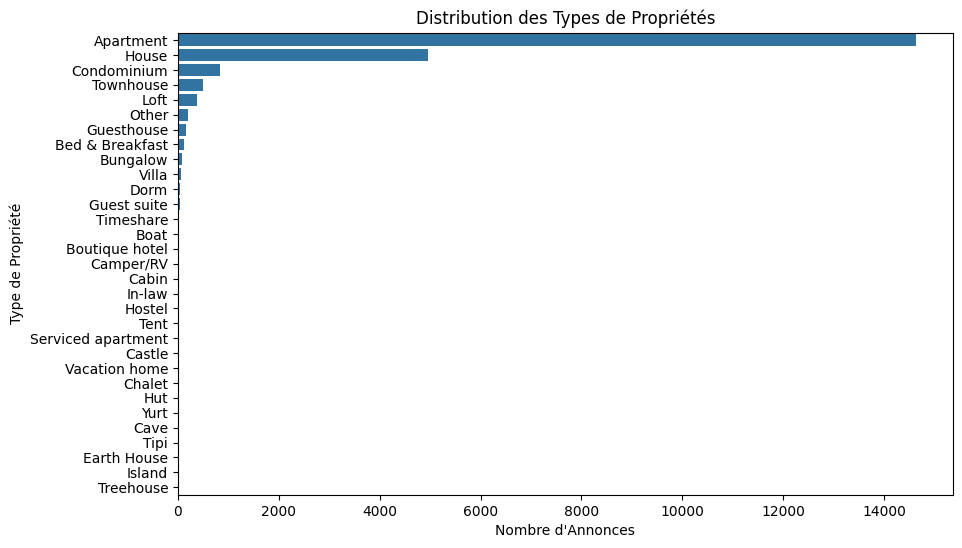

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='property_type', data=train_df, order=train_df['property_type'].value_counts().index)
plt.title('Distribution des Types de Propriétés')
plt.xlabel('Nombre d\'Annonces')
plt.ylabel('Type de Propriété')
plt.show()
#Drop data des données égales à 0

#### Distribution du type de propriété qui a 25 annonces ou plus

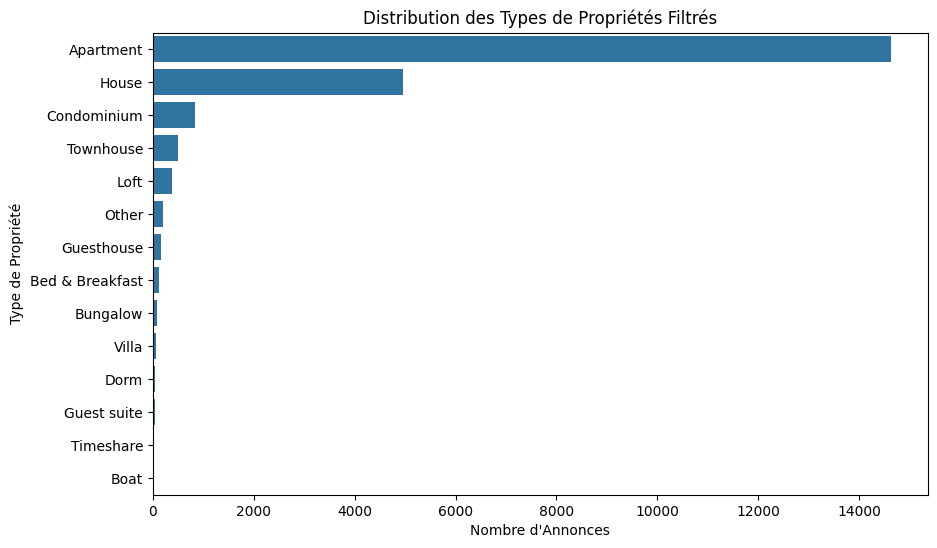

In [ ]:
property_counts = train_df['property_type'].value_counts()
filtered_property_counts = property_counts[property_counts > 25]

# Filter the DataFrame to only include rows with property types found in filtered_property_counts
filtered_df = train_df[train_df['property_type'].isin(filtered_property_counts.index)]

# Create the plot with the filtered DataFrame
plt.figure(figsize=(10, 6))
sns.countplot(y='property_type', data=filtered_df, order=filtered_property_counts.index)
plt.title('Distribution des Types de Propriétés Filtrés')
plt.xlabel('Nombre d\'Annonces')
plt.ylabel('Type de Propriété')
plt.show()

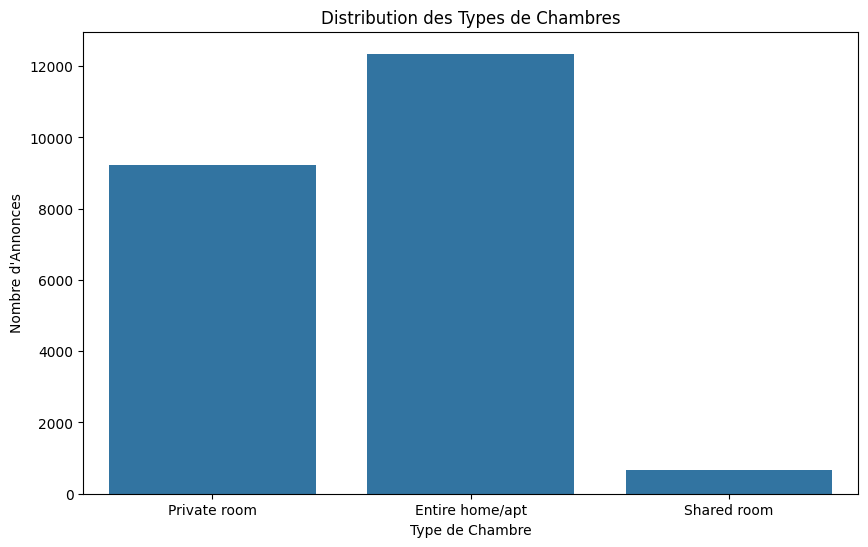

In [ ]:
# Distribution des types de chambres
plt.figure(figsize=(10, 6))
sns.countplot(x='room_type', data=train_df)
plt.title('Distribution des Types de Chambres')
plt.xlabel('Type de Chambre')
plt.ylabel('Nombre d\'Annonces')
plt.show()


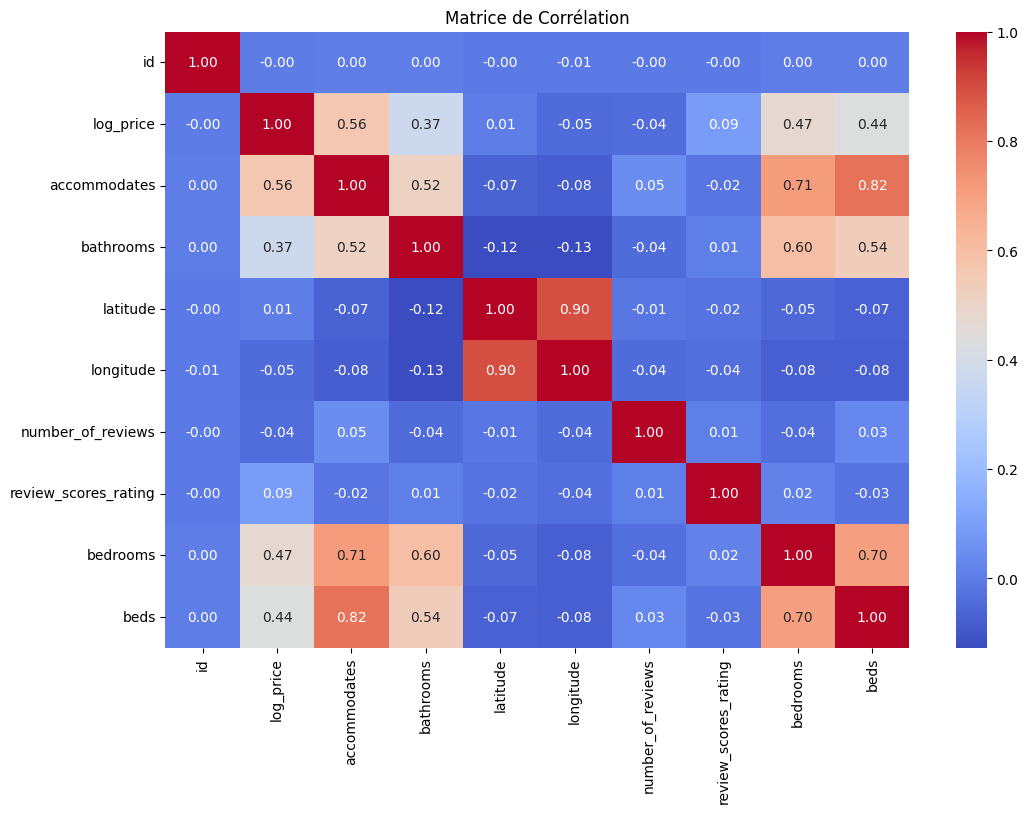

In [ ]:

# Encoder les variables catégorielles avec one-hot encoding
train_encoded = pd.get_dummies(train_df, columns=['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city', 'neighbourhood'])

# Sélectionner les colonnes numériques
numeric_cols = train_encoded.select_dtypes(include=['float64', 'int64'])

# Calculer la matrice de corrélation
corr = numeric_cols.corr()

# Afficher la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Matrice de Corrélation')
plt.show()

A partir de cette matrice de corrélation fait à partir des données entrainés, on peut voir que le prix du logement est corrélé avec les accomodations, les salles de bains, les chambres et les lits. Cela nous oriente a quelle type de données s'interesser.

In [ ]:
import folium

# Création de la carte avec la localisation des biens et leur prix

sampled_data = train_df[['latitude', 'longitude', 'log_price']].sample(n=5000, random_state=42)

map_center = [sampled_data['latitude'].mean(), sampled_data['longitude'].mean()]

price_map = folium.Map(location=map_center, zoom_start=12)

for idx, row in sampled_data.iterrows():
    color = 'green' if row['log_price'] < 4 else 'yellow' if row['log_price'] < 5 else 'red'
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=3,
                        fill=True,
                        fill_opacity=0.7,
                        color=color).add_to(price_map)

# Affichage de la carte
price_map

Dans carte cette nous regardons la répartition des prix en fonction du type de logement. Les points en vert représent représent les prix des habitats dont le prix est inférieur à quatre (prix logarithmique), en jaune, les prix sont entre 4 et 5 et en rouge ceux au délà de cinq.

In [ ]:
# On affiche les valeurs uniques de la colonne 'city'
unique_cities = train_df['city'].unique()
print(unique_cities) 

['LA' 'NYC' 'DC' 'SF' 'Chicago' 'Boston']


/tmp/ipykernel_257/64097969.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='city', y='log_price', data=average_prices, palette='Set2')


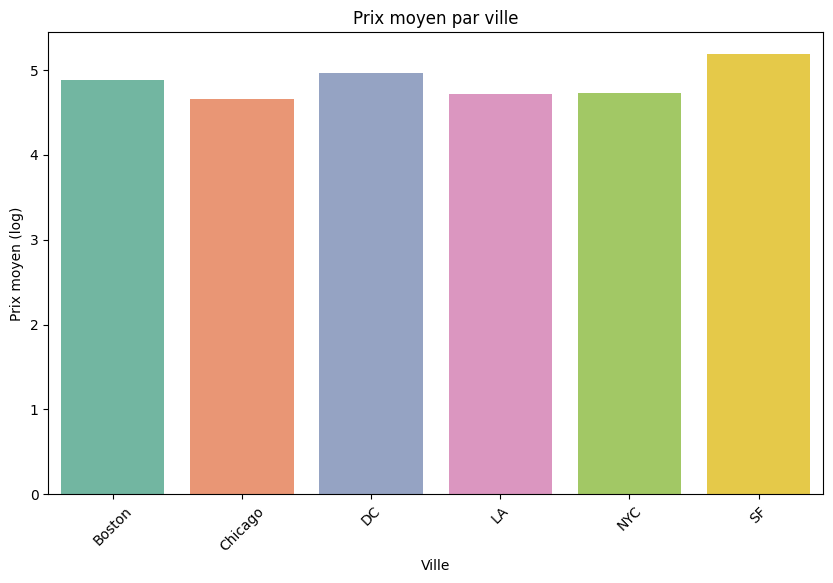

In [ ]:
average_prices = train_df.groupby('city')['log_price'].mean().reset_index()

# Création d'un barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='city', y='log_price', data=average_prices, palette='Set2')
plt.title('Prix moyen par ville')
plt.xlabel('Ville')
plt.ylabel('Prix moyen (log)')
plt.xticks(rotation=45)
plt.show()

Dans ce graphique, le prix est exprimé en échelle logarithmique, ce qui simplifie l'analyse des données. Ce bargraphe nous indique le prix moyen des propriétés dans chaque ville. On peut dire que le moyen des prix des propriétés de chaques villes tournent autour d'un prix logarithmique de 5.

Maintenant que nous avons identifié la catégorie de données qui nous intéresse, nous allons entamer une analyse approfondie des données de ces catégories en les comparant au prix. Cette démarche nous permettra de déterminer quelle donnée spécifique au sein de cette catégorie influence le plus le prix.

#### Relation entre le type de propriété et le prix

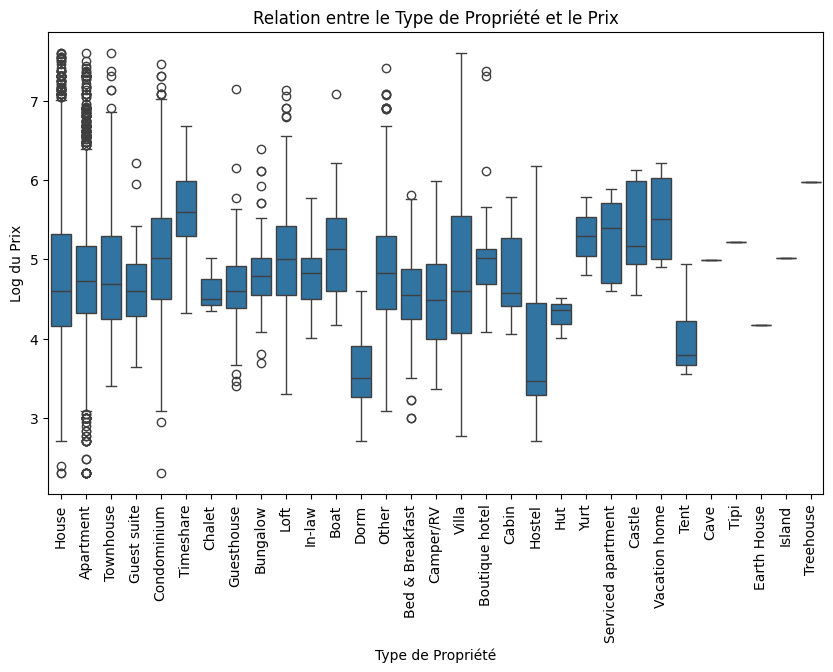

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='property_type', y='log_price', data=train_df)
plt.title('Relation entre le Type de Propriété et le Prix')
plt.xlabel('Type de Propriété')
plt.ylabel('Log du Prix')
plt.xticks(rotation=90)
plt.show()

Nous avons ainsi déterminer la moyenne des prix pour chaque type de maison. Selon ce diagramme en boîte à moustaches, la majorité des catégories de logements présentent une fourchette de prix située entre 4 et 5 sur l'échelle logarithmique.

#### Relation entre le nombre de chambres et le prix

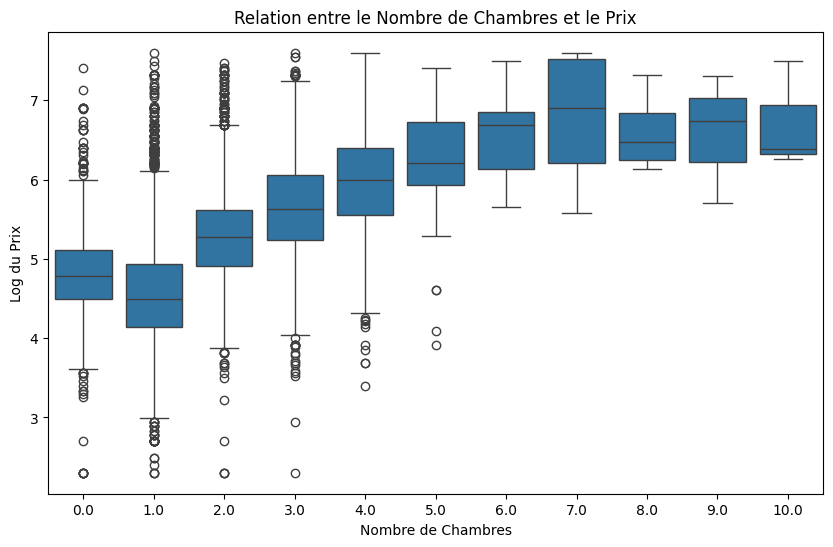

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='log_price', data=train_df)
plt.title('Relation entre le Nombre de Chambres et le Prix')
plt.xlabel('Nombre de Chambres')
plt.ylabel('Log du Prix')
plt.show()

D'après cette boîte à moustache, on peut conclure que le nombre de chambres et le prix sont proportionnelle. Donc le prix du logement dépend du nombre de chambres. Plus il y a de nombre de chambres, plus le prix sera haut.

In [ ]:
# On nettoie et encode la colonne 'amenities', car elle est construite avec des arrays
def encode_amenities(df):
    amenities = df['amenities'].str.strip('{}').str.replace('"', '').str.get_dummies(sep=',')
    df = pd.concat([df, amenities], axis=1)
    return df

# On applique la modification
train_df = encode_amenities(train_df)

In [ ]:
# On supprimes les colonnes textuelles non utilisables et non pertinentes , ces valeurs n'ont aucun impact sur le log du prix
columns_to_drop = ['name', 'last_review', 'id', 'description', 'neighbourhood_overview', 'host_name', 'host_about']
train_df.drop(columns=[col for col in columns_to_drop if col in train_df.columns], inplace=True)

In [ ]:
# On encoder les autres variables catégorielles grace a get_dummies pour sortir des valeurs numériques
categorical_columns = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city', 'neighbourhood']
train_df = pd.get_dummies(train_df, columns=categorical_columns)



In [ ]:
# On sélectionne uniquement les colonnes numériques qui peuvent etre quantifiables
numeric_df = train_df.select_dtypes(include=['number'])

In [ ]:
# On imputer les valeurs manquantes grace au fit
imputer = SimpleImputer(strategy='mean')
numeric_df_imputed = pd.DataFrame(imputer.fit_transform(numeric_df), columns=numeric_df.columns)


In [ ]:
# Vérifier les types de données pour s'assurer qu'il ne reste que des colonnes numériques
print(numeric_df_imputed.dtypes)

log_price                                     float64
accommodates                                  float64
bathrooms                                     float64
latitude                                      float64
longitude                                     float64
                                               ...   
Wide hallway clearance                        float64
Window guards                                 float64
Wireless Internet                             float64
translation missing: en.hosting_amenity_49    float64
translation missing: en.hosting_amenity_50    float64
Length: 133, dtype: object


## Partie Prédiction

In [ ]:
# Séparer les caractéristiques et la cible
X = numeric_df_imputed.drop(['log_price'], axis=1)
y = numeric_df_imputed['log_price']

In [ ]:
# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Réduire la dimensionnalité avec PCA
pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
# Modèle de régression linéaire avec descente de gradient
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_model.fit(X_train, y_train)

SGDRegressor(random_state=42)

In [ ]:
# Prédictions et évaluation
y_pred_sgd = sgd_model.predict(X_test)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)
print(f'SGD Regressor RMSE: {mse_sgd ** 0.5}')
print(f'SGD Regressor R²: {r2_sgd}')


SGD Regressor RMSE: 29356303853.31754
SGD Regressor R²: -1.6822220032788317e+21


La RMSE est très éléve donc ce model ne parvient pas à correler les caractéristiques entres elles.



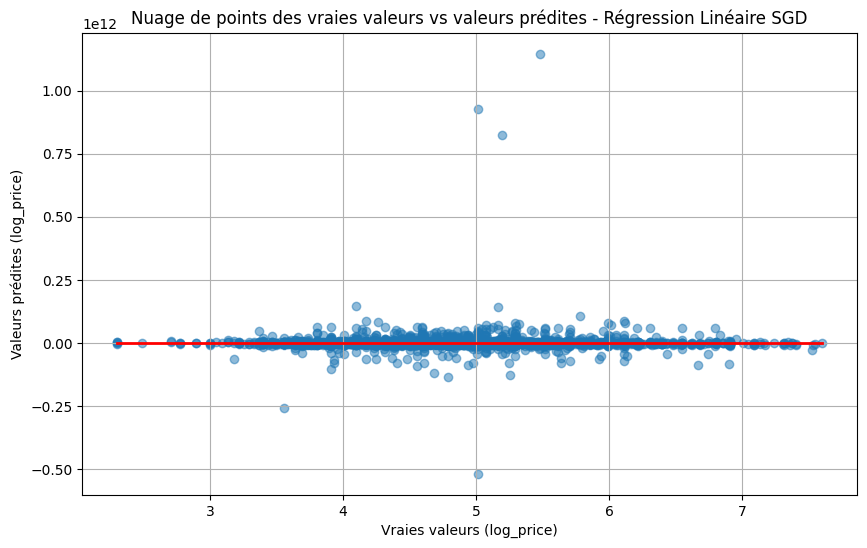

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_sgd, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linewidth=2)
plt.xlabel('Vraies valeurs (log_price)')
plt.ylabel('Valeurs prédites (log_price)')
plt.title('Nuage de points des vraies valeurs vs valeurs prédites - Régression Linéaire SGD')
plt.grid(True)
plt.show()

L'échelle est trop petite donc la visualisation n'est pas performante

In [ ]:
# Modèle SVM
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)
print(f'SVM RMSE: {mse_svm ** 0.5}')
print(f'SVM R²: {r2_svm}')

SVM RMSE: 0.5613336074563535
SVM R²: 0.3849326838681342


Comparé au modèle précedent le RMSE est plus raisonnable et indique que le modèle SVM est capable de faire des predictions relativements précises.

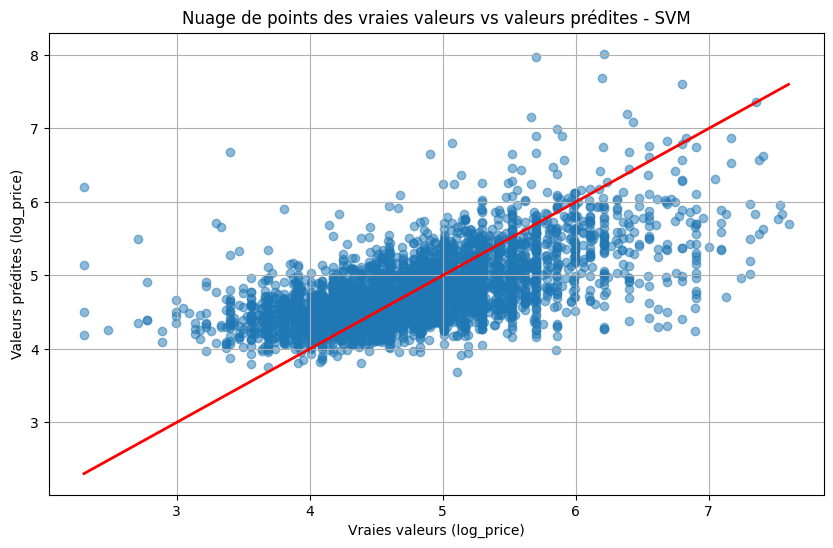

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svm, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linewidth=2)
plt.xlabel('Vraies valeurs (log_price)')
plt.ylabel('Valeurs prédites (log_price)')
plt.title('Nuage de points des vraies valeurs vs valeurs prédites - SVM')
plt.grid(True)
plt.show()

On voit sur le plot que la précision est plus accurate malgré le fait qu'elle ne soit pas parfaite

In [ ]:
# Modèle d'arbre de décision
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print(f'Arbre de décision RMSE: {mse_tree ** 0.5}')
print(f'Arbre de décision R²: {r2_tree}')

Arbre de décision RMSE: 0.79822471920529
Arbre de décision R²: -0.24374373544330963


On peut donc voir que le modele SVM est le plus performant car il a le RMSE le plus faible

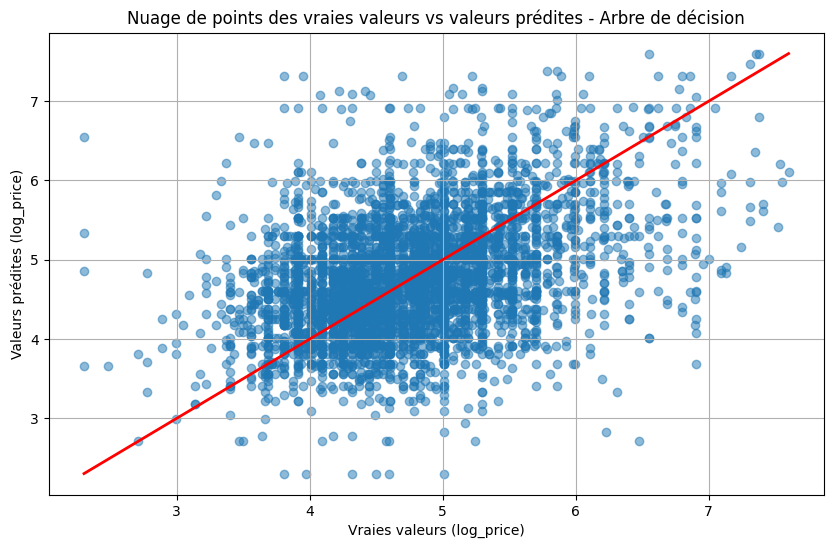

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tree, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linewidth=2)
plt.xlabel('Vraies valeurs (log_price)')
plt.ylabel('Valeurs prédites (log_price)')
plt.title('Nuage de points des vraies valeurs vs valeurs prédites - Arbre de décision')
plt.grid(True)
plt.show()

On conclut que la regression linéaire est le modèle moins efficace dans notre cas et que le SVM est un peu plus performant que l'arbre de decision

# Partie Prediction appliquée sur Test_df


In [ ]:
# On recharge nos dataset et on refait les memes procédures auparavant avec le test_df
train_df = pd.read_csv('airbnb_train.csv')
test_df = pd.read_csv('airbnb_test.csv')

# La premiere colonne des id du csv test n'a pas le bon nommage
test_df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

# Certaines properies ne sont pas dans le csv test donc on supprime pour pas avoir de conflit lors du fit
exclude_properties = ['Island', 'Casa particular', 'Lighthouse', 'Parking Space', 'Train']
train_df = train_df[~train_df['property_type'].isin(exclude_properties)]
test_df = test_df[~test_df['property_type'].isin(exclude_properties)]

test_ids = test_df['id']

# Fonction pour nettoyer et encoder les colonnes 'amenities'
def encode_amenities(df):
    amenities = df['amenities'].str.strip('{}').str.replace('"', '').str.get_dummies(sep=',')
    df = pd.concat([df, amenities], axis=1)
    return df

# Appliquer le nettoyage et l'encodage aux datasets
train_df = encode_amenities(train_df)
test_df = encode_amenities(test_df)

# On supprimer les colonnes textuelles non utilisables et non pertinentes
columns_to_drop = ['name', 'last_review', 'description', 'neighbourhood_overview', 'host_name', 'host_about', 'neighbourhood']
train_df.drop(columns=[col for col in columns_to_drop if col in train_df.columns], inplace=True)
test_df.drop(columns=[col for col in columns_to_drop if col in test_df.columns], inplace=True)

# On encode les autres variables catégorielles
categorical_columns = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city']
train_df = pd.get_dummies(train_df, columns=categorical_columns)
test_df = pd.get_dummies(test_df, columns=categorical_columns)

# On aligne les deux dataframe pour qu'ils aient le meme nombre de colonnes
train_df, test_df = train_df.align(test_df, join='outer', axis=1, fill_value=0)

test_df['id'] = test_ids

# On sélectionne uniquement les colonnes numériques (exclure 'id' et 'log_price')
numeric_train_df = train_df.select_dtypes(include=['number']).drop(columns=['id'])
numeric_test_df = test_df.select_dtypes(include=['number']).drop(columns=['id'])

# On fit les valeurs manquantes
imputer = SimpleImputer(strategy='mean')
numeric_train_df_imputed = pd.DataFrame(imputer.fit_transform(numeric_train_df), columns=numeric_train_df.columns)
numeric_test_df_imputed = pd.DataFrame(imputer.transform(numeric_test_df), columns=numeric_test_df.columns)

# On sépare les caractéristiques et la cible dans le dataset d'entraînement
X = numeric_train_df_imputed.drop(['log_price'], axis=1)
y = numeric_train_df_imputed['log_price']

# On Standardise
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(numeric_test_df_imputed.drop(['log_price'], axis=1))

# On applique PCA
pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(X_scaled)
X_test_pca = pca.transform(X_test_scaled)

# On sépare nos données entrainée et tester
X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Modèle SVM
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred_test = svm_model.predict(X_test_pca)

# Créer un fichier CSV avec les prédictions
predictions_df = pd.DataFrame({
    'id': test_ids,  
    'log_price': y_pred_test
})

predictions_df.to_csv('predicted_svm.csv', index=False)

# Afficher les premières lignes du fichier CSV créé pour vérifier la génération
predictions_df.head()


id  log_price
0  14282777   4.540995
1  17029381   5.198892
2   7824740   5.216704
3  19811650   5.214813
4  12410741   4.137472

In [ ]:
predicted_df = pd.read_csv("predicted_svm.csv")
predicted_df

id  log_price
0      14282777   4.540995
1      17029381   5.198892
2       7824740   5.216704
3      19811650   5.214813
4      12410741   4.137472
...         ...        ...
51867  14844128   4.769528
51868  16051971   5.487032
51869  16429629   4.377230
51870    324969   4.992060
51871   9684189   5.079970

[51872 rows x 2 columns]

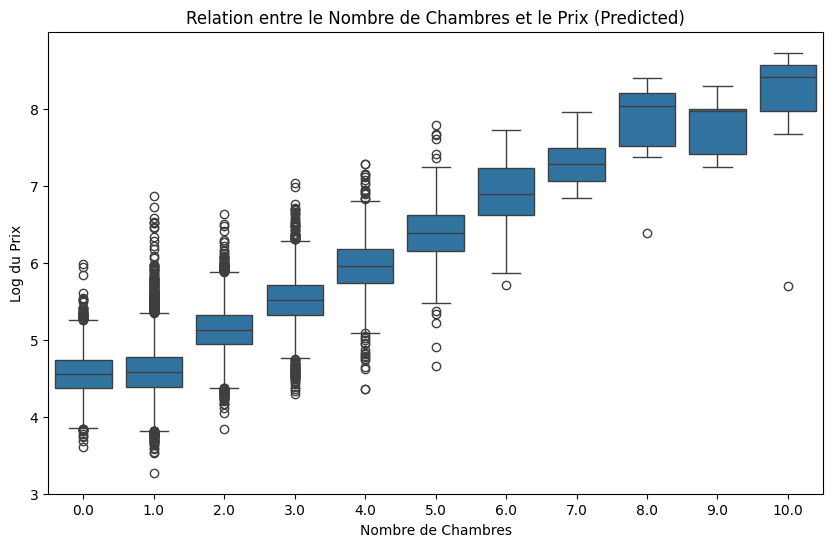

In [ ]:

predictions_df = pd.read_csv('predicted_svm.csv')
test_df = pd.read_csv('airbnb_test.csv')

test_df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

exclude_properties = ['Island', 'Casa particular', 'Lighthouse', 'Parking Space', 'Train']
test_df = test_df[~test_df['property_type'].isin(exclude_properties)]

merged_df = test_df.merge(predictions_df, on='id', how='left', suffixes=('', '_predicted'))

plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='log_price', data=merged_df)
plt.title('Relation entre le Nombre de Chambres et le Prix (Predicted)')
plt.xlabel('Nombre de Chambres')
plt.ylabel('Log du Prix')
plt.show()

Le graphique montre la relation entre le nombre de chambres et le log du prix prédit pour différentes propriétés. On observe que le prix médian augmente avec le nombre de chambres jusqu'à environ 5 chambres, après quoi il se stabilise. Les prix des propriétés avec 0 chambre présentent une grande variabilité, suggérant des caractéristiques atypiques. Les valeurs extrêmes ou outliers sont présentes dans presque toutes les catégories, indiquant des prix qui s'écartent significativement de la plupart des propriétés similaires. 

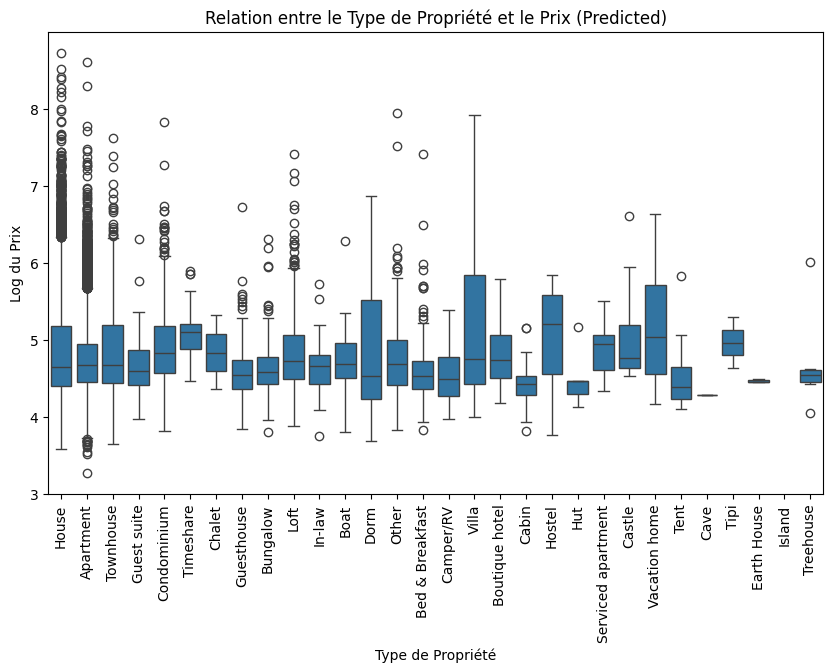

In [ ]:


predictions_df = pd.read_csv('predicted_svm.csv')
test_df = pd.read_csv('airbnb_test.csv')


test_df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)


exclude_properties = ['Island', 'Casa particular', 'Lighthouse', 'Parking Space', 'Train']
test_df = test_df[~test_df['property_type'].isin(exclude_properties)]


merged_df = test_df.merge(predictions_df, on='id', how='left', suffixes=('', '_predicted'))

# Ordre des types de propriété pour comparer avec le train
property_order = [
    'House', 'Apartment', 'Townhouse', 'Guest suite', 'Condominium', 'Timeshare', 'Chalet', 
    'Guesthouse', 'Bungalow', 'Loft', 'In-law', 'Boat', 'Dorm', 'Other', 'Bed & Breakfast', 
    'Camper/RV', 'Villa', 'Boutique hotel', 'Cabin', 'Hostel', 'Hut', 'Serviced apartment', 
    'Castle', 'Vacation home', 'Tent', 'Cave', 'Tipi', 'Earth House', 'Island', 'Treehouse'
]

merged_df['property_type'] = pd.Categorical(merged_df['property_type'], categories=property_order, ordered=True)

# Créer le graphique boxplot avec l'ordre des types de propriété spécifié
plt.figure(figsize=(10, 6))
sns.boxplot(x='property_type', y='log_price', data=merged_df)
plt.title('Relation entre le Type de Propriété et le Prix (Predicted)')
plt.xlabel('Type de Propriété')
plt.ylabel('Log du Prix')
plt.xticks(rotation=90)
plt.show()


Ce graphique représente la relation entre le type de propriété et le log du prix prédit. Les médianes des prix varient considérablement selon le type de propriété, avec des propriétés comme les châteaux et les villas affichant généralement des prix médians plus élevés. Les boîtes indiquent la dispersion des prix autour de la médiane pour chaque type de propriété, montrant une grande variabilité pour certains types comme les maisons et les châteaux. De nombreux outliers suggèrent des écarts de prix notables pour des propriétés atypiques. Globalement, le graphique montre que le modèle prédit une diversité de prix qui reflète une gamme étendue de valeurs immobilières selon le type de propriété.

#### Comparaison entre les données réelles et les données prédits du nombre de chambre en fonction du prix (logarithme du prix)

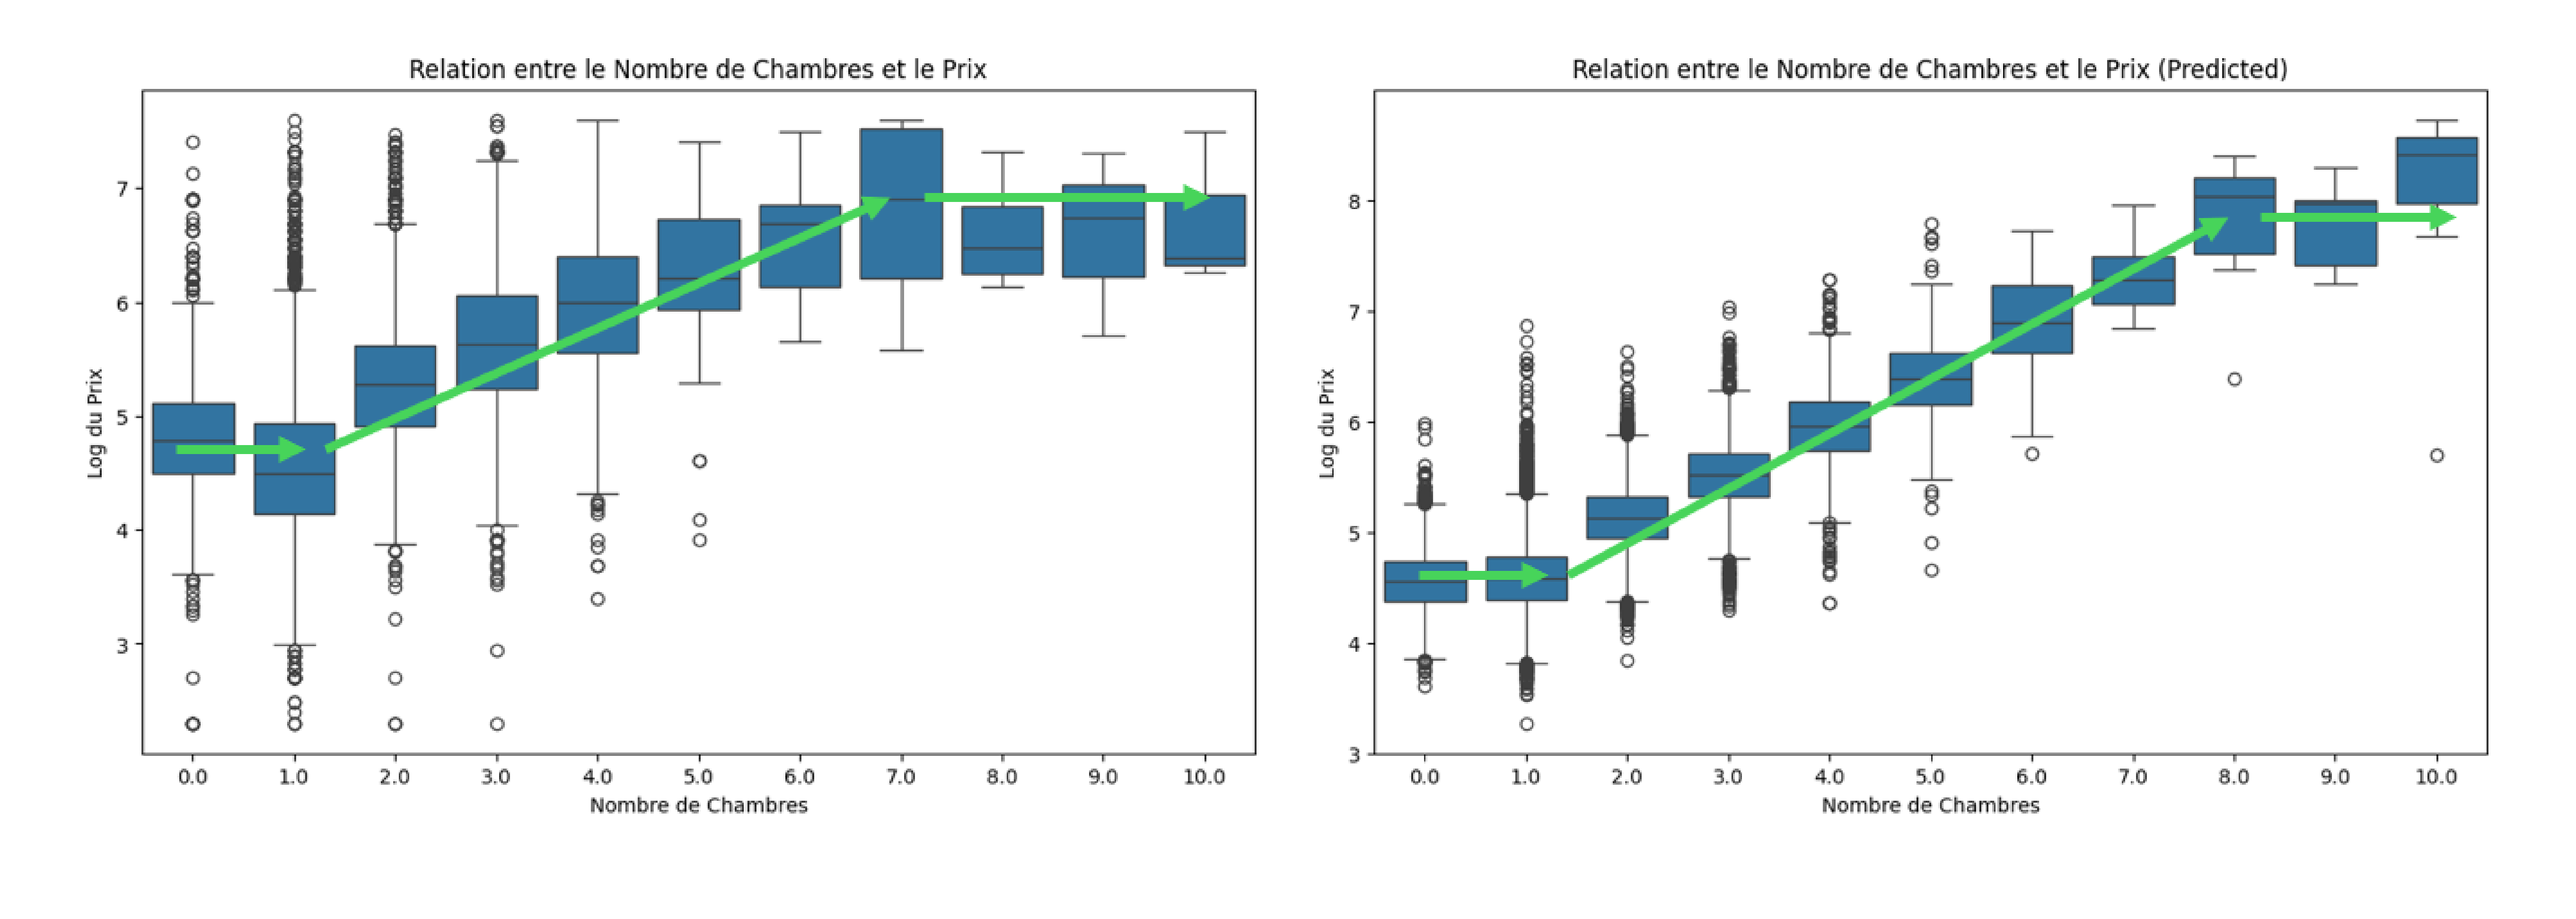

In [3]:
import matplotlib.image as mpimg

img = mpimg.imread('/work/image-20240601-221957.png')
plt.figure(figsize=(70, 70))  
plt.imshow(img)
plt.axis('off') 
plt.show()

#### Comparaison entre les données réelles et les données prédits du type de propriété en fonction du prix (logarithme du prix)

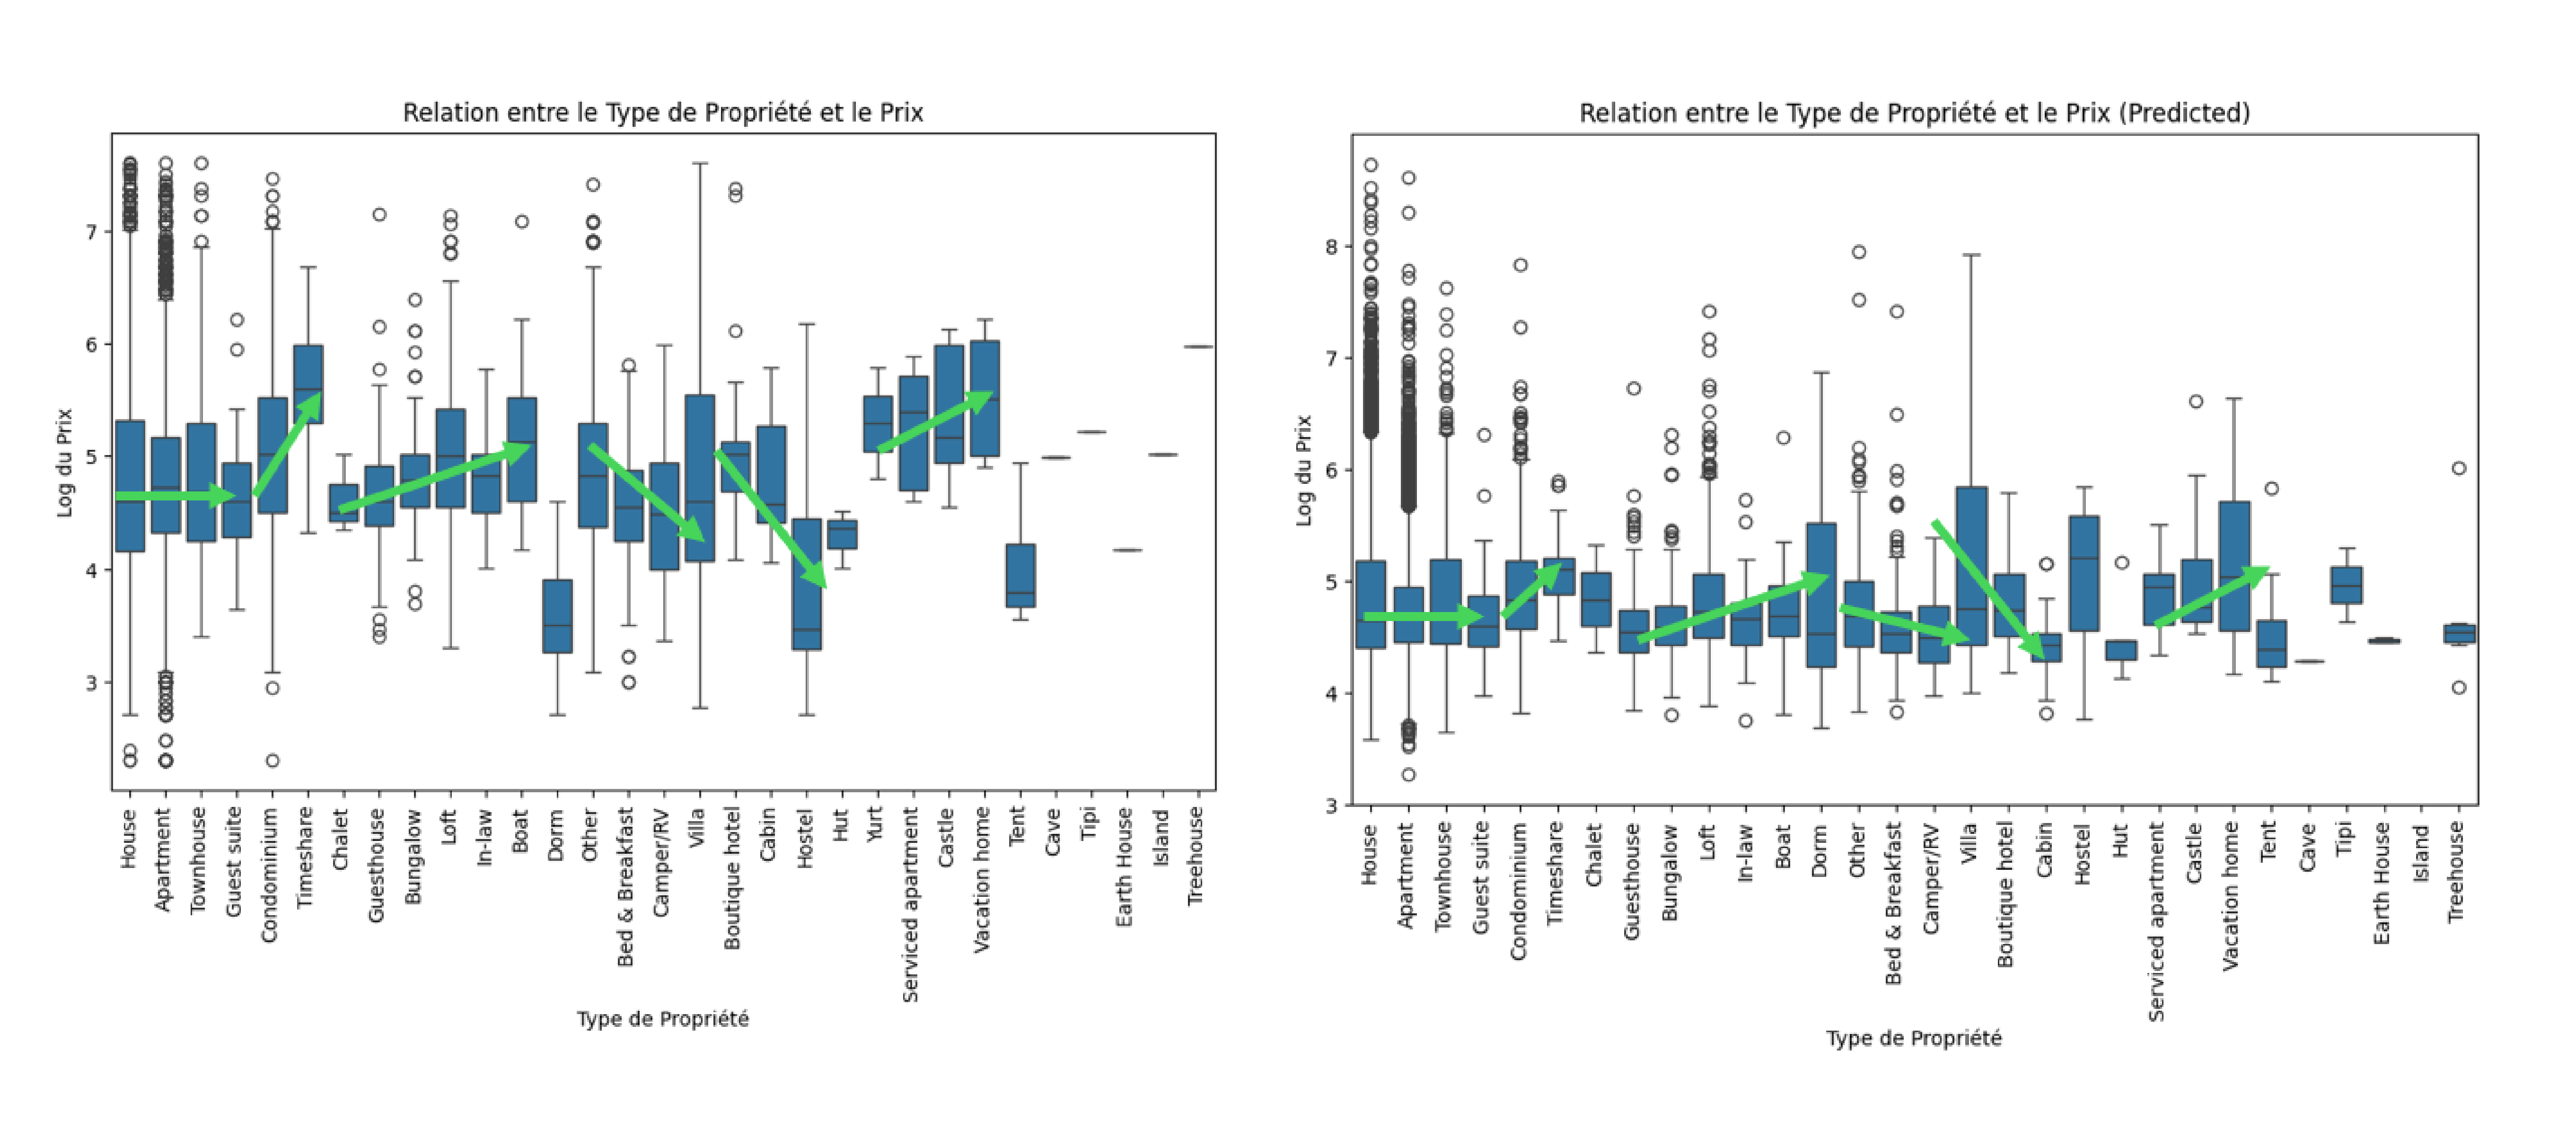

In [1]:
img = mpimg.imread('/work/image-20240601-222018.png')
plt.figure(figsize=(70, 70))  
plt.imshow(img)
plt.axis('off')  
plt.show()

Ces deux images montrent deux graphiques à boîte à moustaches qui représentent : pour la première image, la relation entre le nombre de chambre et le prix (logarithme du prix) et pour le deuxième image, le type de propriété et le prix (logarithme du prix), pour les données réelles (à gauche) et pour les données prédites par un modèle (à droite). Les lignes vertes dans chaque boîte de ces graphiques représentent les le sens de l'évoltion du prix logarithmique pour chaque type de propriété. Les lignes vertes dans les deux graphiques montrent des tendances similaires, indiquant que le modèle prédit des valeurs qui suivent de près la distribution médiane des prix réels.
Cela suggère que le modèle est assez bon pour estimer la valeur centrale des prix pour chaque type de propriété, bien que les détails de la distribution (comme la dispersion et les valeurs extrêmes) puissent différer.

In [ ]:
# Création de la carte avec la localisation des biens et leur prix à partir de la base de donnée prédit

sampled_data = merged_df[['latitude', 'longitude', 'log_price']].sample(n=5000, random_state=42)

map_center = [sampled_data['latitude'].mean(), sampled_data['longitude'].mean()]

price_map = folium.Map(location=map_center, zoom_start=12)

for idx, row in sampled_data.iterrows():
    color = 'green' if row['log_price'] < 4.3 else 'yellow' if row['log_price'] < 4.8 else 'red'
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=3,
                        fill=True,
                        fill_opacity=0.7,
                        color=color).add_to(price_map)

# Affichage de la carte
price_map

Cette carte est génerer avec le df predicted. Nous avons approximer l'échelle des log_price par rapport à notre prediction qui n'était pas accurate a 100%, nous pouvons constater en comparant avec la premiere carte sur certaines zones géographique que la prédiction est similaire.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3d0fe6d1-0672-4930-bbe2-e5bc81887b3a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>